### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import dataset

In [ ]:
df=pd.read_csv('jobs1.csv')

### Exploratory data analysis

In [ ]:
df.head()

,Job Title,Job URL,Company Name,Company URL,Exp,Salary,Location,Skills,Posted
0,Data Engineer: Machine Learning,https://www.naukri.com/job-listings-data-engin...,IBM,https://www.naukri.com/ibm-jobs-careers-16987,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...,1 Day Ago
1,Data Engineer: Machine Learning,https://www.naukri.com/job-listings-data-engin...,IBM,https://www.naukri.com/ibm-jobs-careers-16987,4-6 Yrs,Not disclosed,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...,4 Days Ago
2,Manager - Machine Learning Engineer ( Data Sci...,https://www.naukri.com/job-listings-manager-ma...,Pylon Management Consulting Pvt Ltd,https://www.naukri.com/pylon-management-consul...,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...,1 Day Ago
3,Data Scientist-Python Machine Learning,https://www.naukri.com/job-listings-data-scien...,Jubna,https://www.naukri.com/premium-service-jobs-ca...,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...,1 Day Ago
4,Senior/Lead Data Scientist - Machine Learning/...,https://www.naukri.com/job-listings-senior-lea...,Squareroot Consulting Pvt Ltd.,https://www.naukri.com/squareroot-consulting-j...,1-6 Yrs,Not disclosed,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...,NaN


In [ ]:
# Checking for null values
df.isnull().sum()

Job Title         0
Job URL           0
Company Name      0
Company URL       0
Exp               0
Salary            0
Location          0
Skills            0
Posted          368
dtype: int64

In [ ]:
# Checking columns of our dataset
df.columns
df['Location'] = df['Location'].replace('Bangalore/Bengaluru', 'Bengaluru')
df['Location'] = df['Location'].replace('Bengaluru/Bangalore', 'Bengaluru')
df['Location'] = df['Location'].replace('Hyderabad', 'Hyderabad/Secunderabad')

In [ ]:
df.shape

(994, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     994 non-null    object
 1   Job URL       994 non-null    object
 2   Company Name  994 non-null    object
 3   Company URL   994 non-null    object
 4   Exp           994 non-null    object
 5   Salary        994 non-null    object
 6   Location      994 non-null    object
 7   Skills        994 non-null    object
 8   Posted        626 non-null    object
dtypes: object(9)
memory usage: 70.0+ KB


### Feature engineering

In [ ]:
# Dropping irrelevant features
df.drop(['Job URL','Posted','Company URL'],axis=1,inplace=True)

In [ ]:
df.head()

,Job Title,Company Name,Exp,Salary,Location,Skills
0,Data Engineer: Machine Learning,IBM,4-8 Yrs,Not disclosed,Bengaluru,deep learning|Interpersonal skills|Time manage...
1,Data Engineer: Machine Learning,IBM,4-6 Yrs,Not disclosed,Bengaluru,deep learning|Interpersonal skills|Time manage...
2,Manager - Machine Learning Engineer ( Data Sci...,Pylon Management Consulting Pvt Ltd,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...
3,Data Scientist-Python Machine Learning,Jubna,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...
4,Senior/Lead Data Scientist - Machine Learning/...,Squareroot Consulting Pvt Ltd.,1-6 Yrs,Not disclosed,Bengaluru,Visualization|Exploratory Testing|Machine Lear...


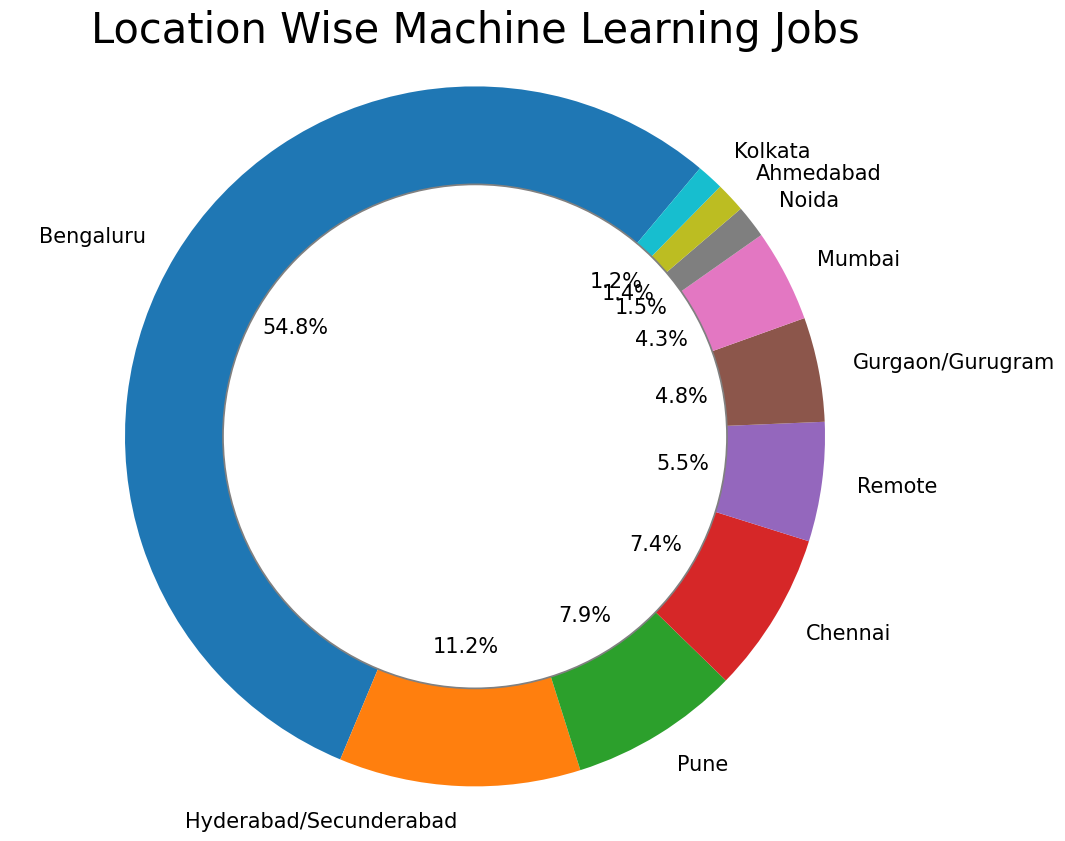

In [ ]:
df.Location.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Machine Learning Jobs",fontsize=30)

circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
plt.show()

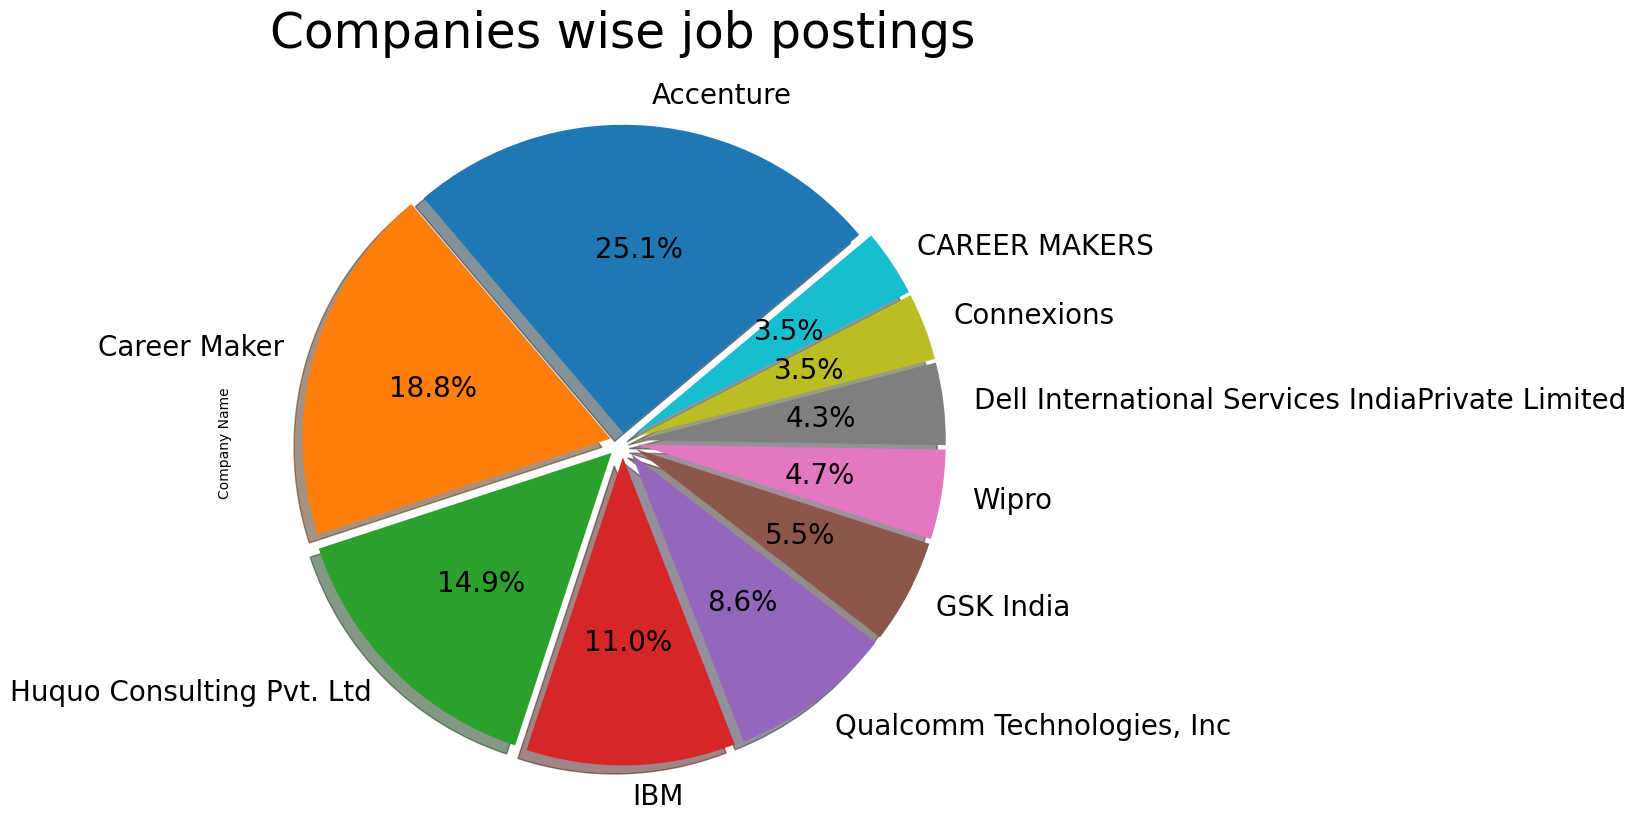

In [ ]:
# Company wise distribution of jobs
df["Company Name"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies wise job postings",fontsize=35)
plt.show()

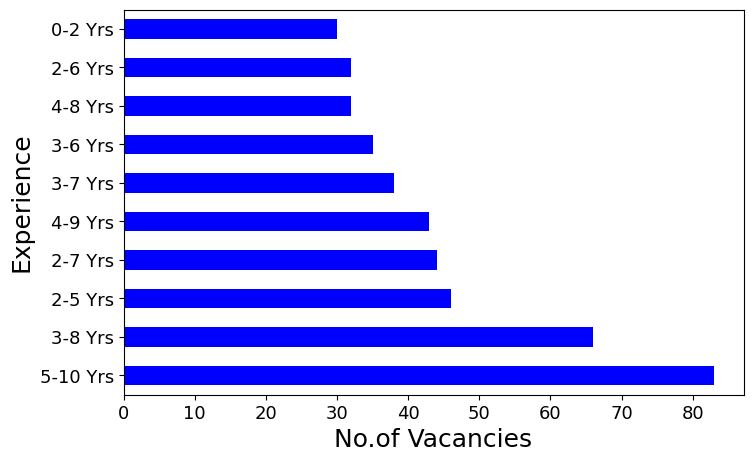

In [ ]:
#Experience wise distribution of jobs
df["Exp"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

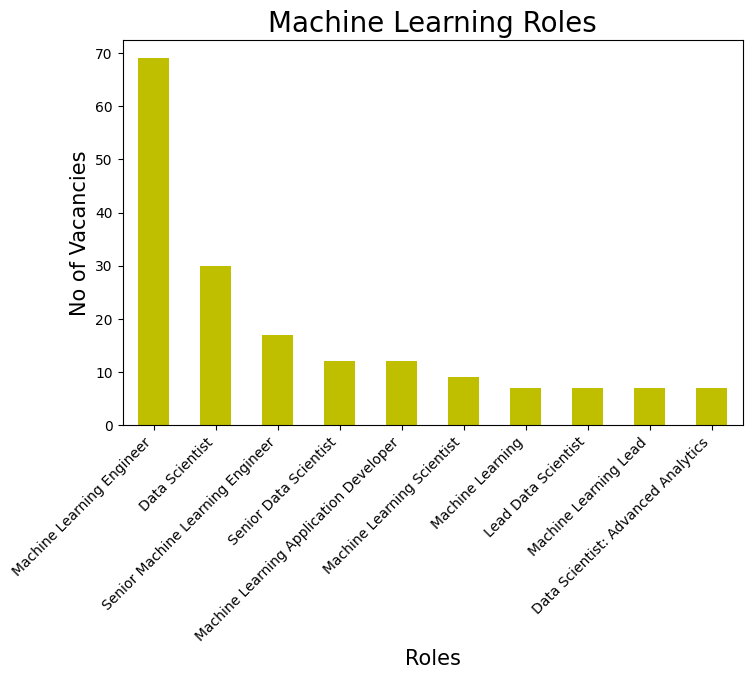

In [ ]:
# Job wise distribution
df["Job Title"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Machine Learning Roles",fontsize=20)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

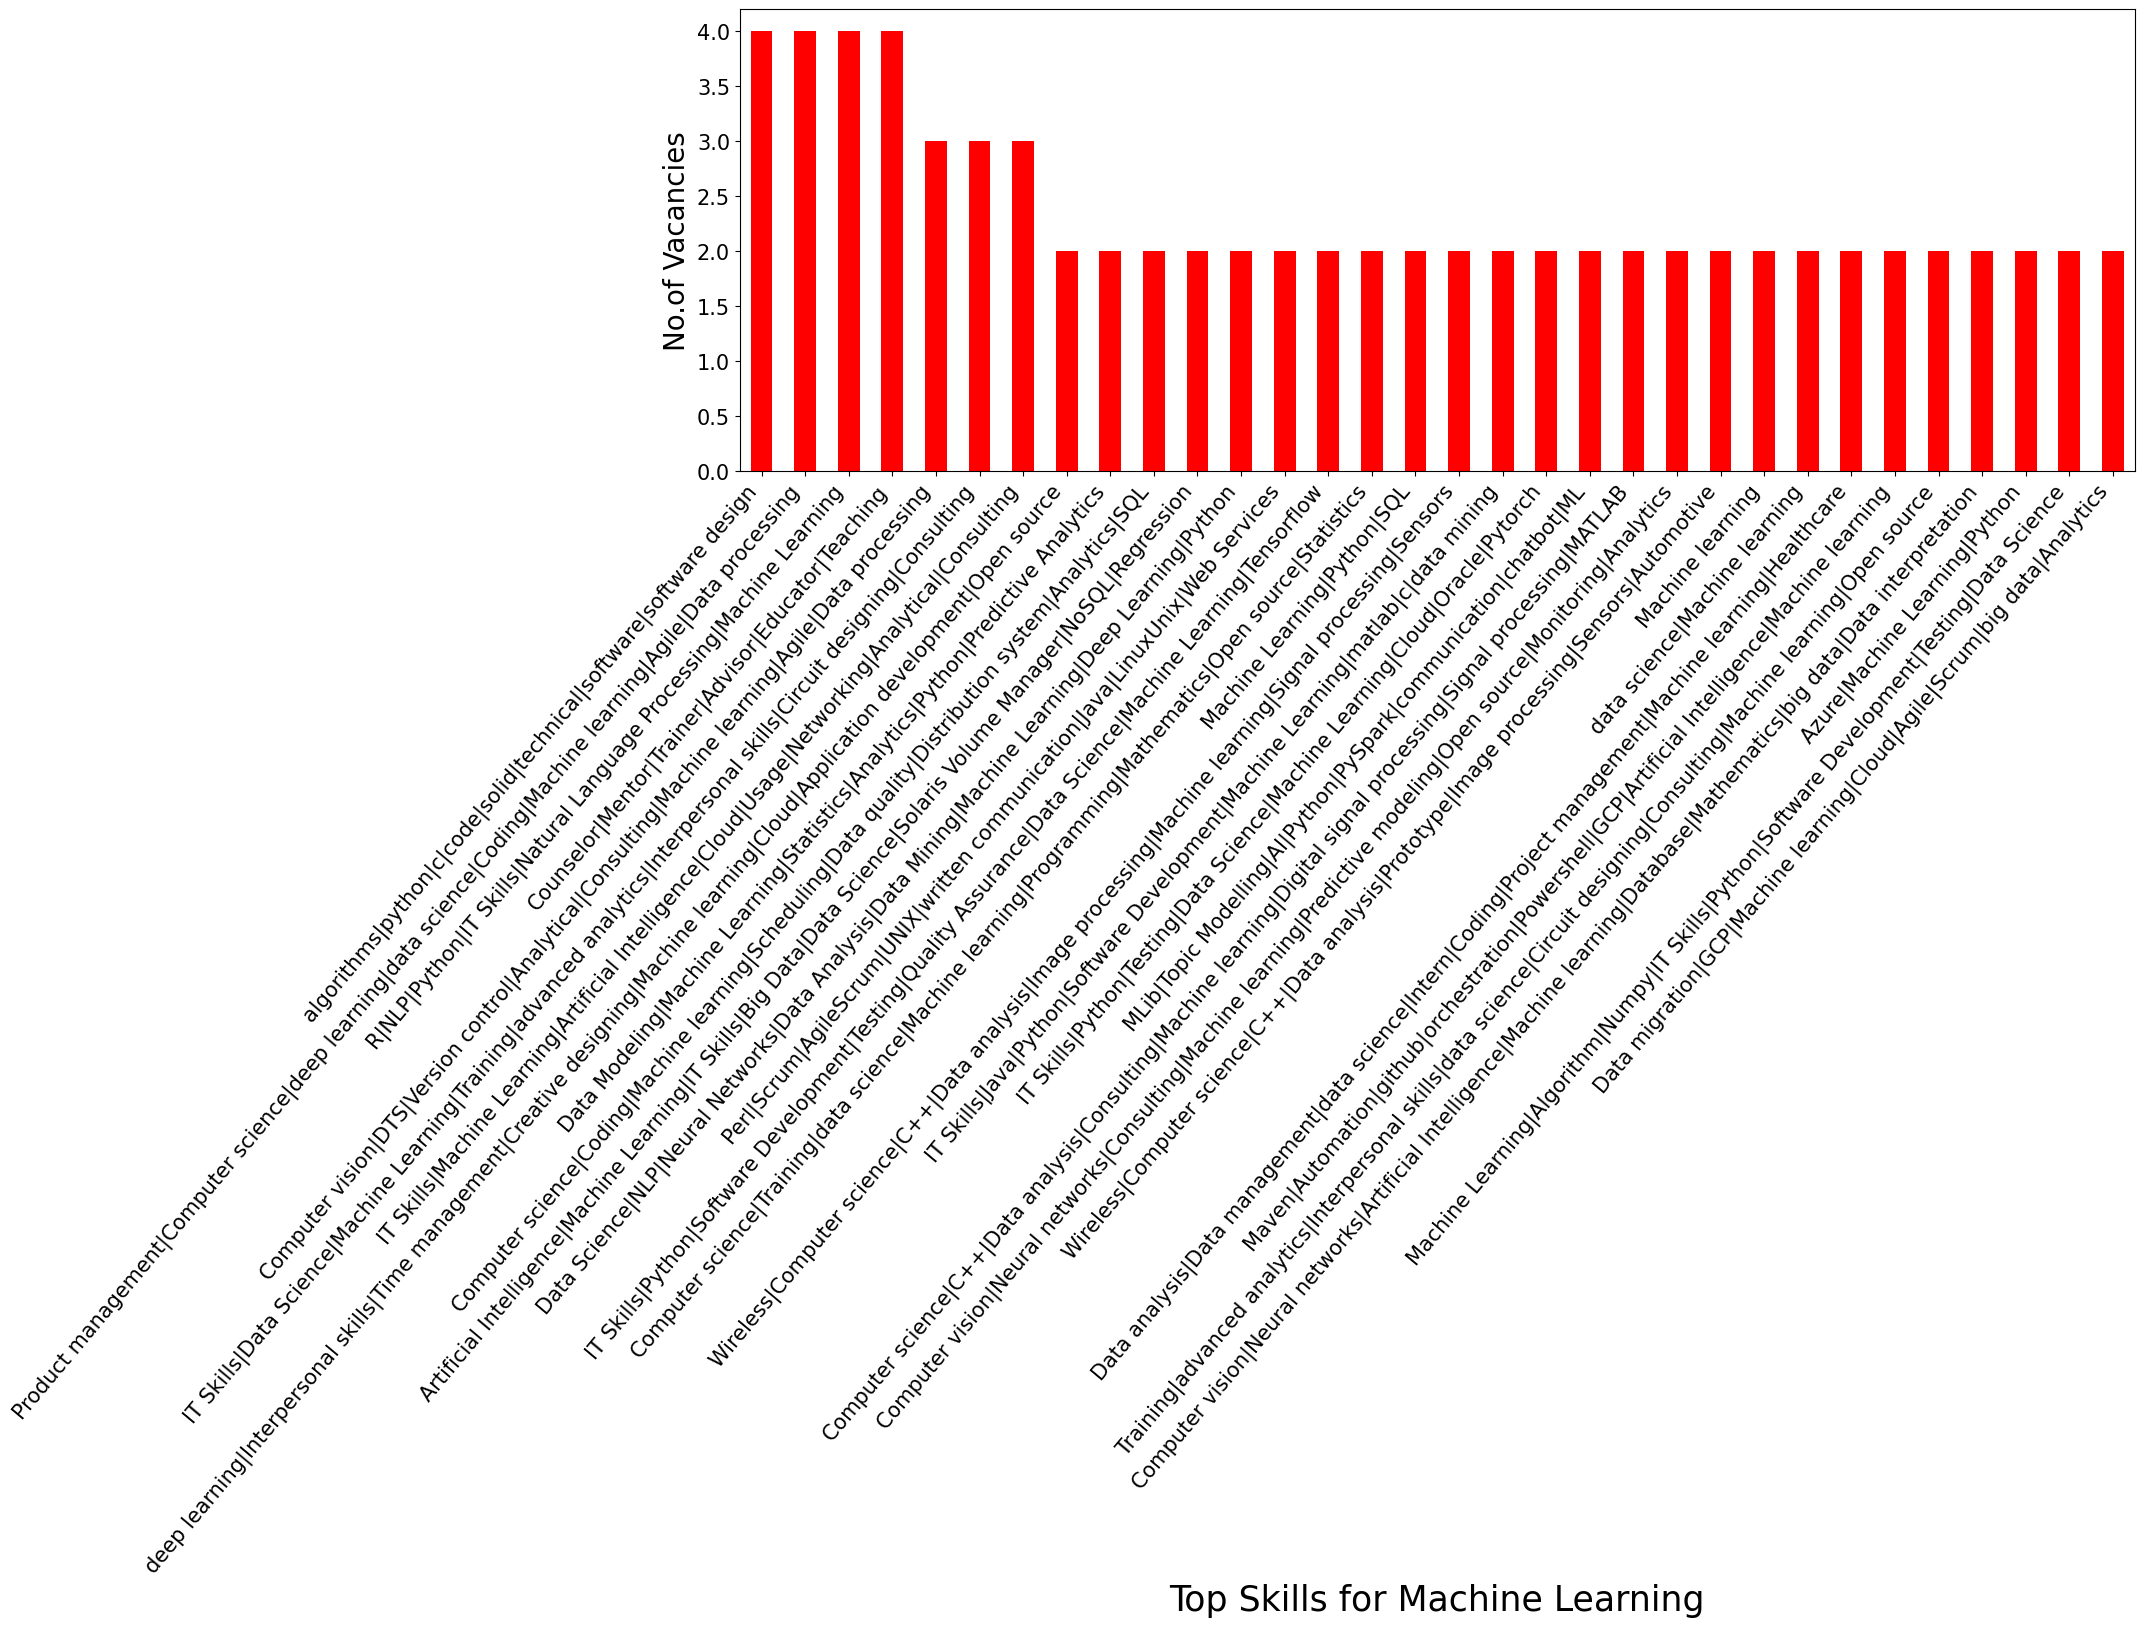

In [ ]:
# Skills wise distribution
df.Skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Machine Learning",fontsize=25)
plt.show()

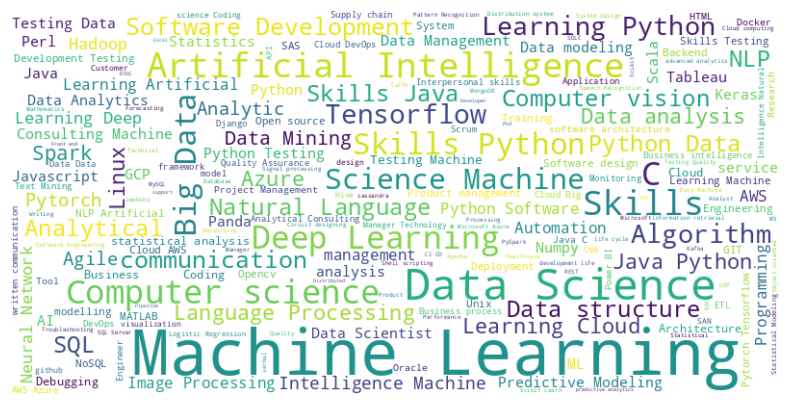

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df['Skills'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

# Function to convert experience to average
def convert_experience(exp):
    exp_values = [int(x) for x in re.findall(r'\d+', exp)]
    return sum(exp_values) / len(exp_values) if len(exp_values) > 0 else None

# Function to convert salary to average
def convert_salary(salary):
    if salary == 'Not disclosed':
        return None
    salary_values = [int(x.replace(',', '')) for x in re.findall(r'\d{1,3},\d{1,3}', salary)]
    return sum(salary_values) / len(salary_values)*1000 if len(salary_values) > 0 else None

# Apply the functions to create new columns
df['Avg_Experience'] = df['Exp'].apply(convert_experience)
df['Avg_Salary'] = df['Salary'].apply(convert_salary)

# Filter out rows with 'Not disclosed' in Salary column
df = df.dropna(subset=['Avg_Salary'])

# Prepare data for linear regression
X = df[['Avg_Experience']]
y = df['Avg_Salary']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print(f'Coefficient: {(model.coef_[0]*(-1))}')
print(f'Intercept: {model.intercept_}')




Coefficient: 35190.86396552878
Intercept: 2714614.950219717


In [ ]:
# Get input from user for years of experience
user_experience = float(input("Enter years of experience: "))

# Predict the salary for user input
new_experience = [[user_experience]]
predicted_salary = model.predict(new_experience)
print(f'Predicted Salary for {user_experience} years experience: {predicted_salary[0]}')

Enter years of experience: 5
Predicted Salary for 5.0 years experience: 2538660.630392073


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


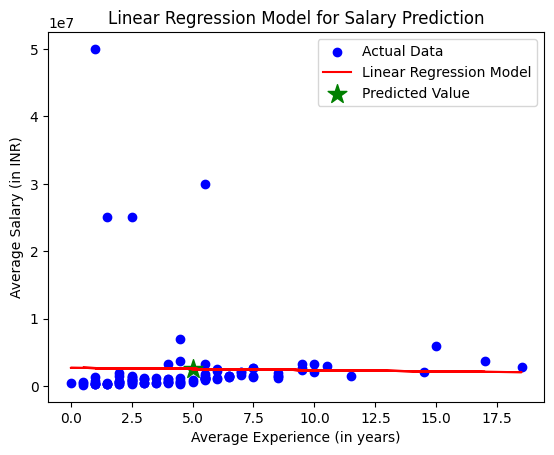

In [ ]:
# Prepare data for linear regression
X = df[['Avg_Experience']]
y = df['Avg_Salary']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)
# Plot the linear regression model
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Model')
plt.scatter(user_experience, predicted_salary, color='green', marker='*', s=200, label='Predicted Value')
plt.xlabel('Average Experience (in years)')
plt.ylabel('Average Salary (in INR)')
plt.title('Linear Regression Model for Salary Prediction')
plt.legend()
plt.show()